<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Perzeptronfunktionen-definieren" data-toc-modified-id="Perzeptronfunktionen-definieren-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Perzeptronfunktionen definieren</a></span></li><li><span><a href="#Beispieldaten-erzeugen" data-toc-modified-id="Beispieldaten-erzeugen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Beispieldaten erzeugen</a></span></li><li><span><a href="#Trainings--und-Testdaten-erzeugen" data-toc-modified-id="Trainings--und-Testdaten-erzeugen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trainings- und Testdaten erzeugen</a></span></li><li><span><a href="#Netz-aufbauen-und-trainieren" data-toc-modified-id="Netz-aufbauen-und-trainieren-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Netz aufbauen und trainieren</a></span></li><li><span><a href="#Netz-testen" data-toc-modified-id="Netz-testen-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Netz testen</a></span></li></ul></div>

# Perzeptronfunktionen definieren

In [1]:
import numpy as np
from random import randint

# RELU
def f(x):
    if x < 0:
        return 0
    else:
        return x
    
f = np.vectorize(f)

def create_new_perceptron(nr_inputs, nr_outputs):
    low = -1
    high = +1
    W = np.random.uniform(low,high, (nr_inputs, nr_outputs) )
    return W


def test_perceptron(W, x_test, y_test):
    
    nr_test_samples = x_test.shape[0]    
    correct = 0
    for test_sample_nr in range(0,nr_test_samples):
        
        # Berechnet den Output
        row_vec = x_test[test_sample_nr, :]
        x = np.append(row_vec,[1])
        out = predict(W,x)
        
        # Was wäre richtig gewesen?        
        one_hot_vec = y_test[test_sample_nr, :]
        gt_label = np.argmax( one_hot_vec )

        # Was wurde prädiziert?
        is_label = np.argmax( out )

        #print(gt_label, is_label)
        if is_label == gt_label:
            correct += 1     
            
    print("Korrekt: {} von {}".format(correct,nr_test_samples))
    
    return correct/nr_test_samples
    

def train_perceptron(W,
                     x_train, y_train,
                     x_test, y_test,
                     nr_train_steps,
                     alpha):
    
    nr_outputs = y_train.shape[1]
    
    history = []
       
    for train_step_nr in range(0, nr_train_steps):
        
        rnd_img_nr = randint(0,y_train.shape[0]-1)
        
        # Suche zufällige Zeile aus den
        # Trainingsdaten raus
        row_vec = x_train[rnd_img_nr, :]        
        x = np.append(row_vec,[1])        
        out = predict(W,x)
        
        # Was hätte rauskommen sollen?
        one_hot_vec = y_train[rnd_img_nr, :]
                                
        # Fehlerberechnung        
        error = one_hot_vec - out
        
        # Trainingsschritt
        for j in range(0, nr_outputs):
            delta_w_vector = alpha * error[j] * x
            #if train_step_nr % 100 == 0:
            #    print("max weight change", delta_w_vector.max())
            W[:,j] =  W[:,j] + delta_w_vector 
            
        if train_step_nr % 100 == 0:
            print("\nTrain step: ", train_step_nr)
            correct_ratio = test_perceptron(W, x_test, y_test)
            history.append( correct_ratio )
            
    return history


def predict(W,x):
    act = np.matmul(x, W)
    out = f(act)
    return out
    

# Beispieldaten erzeugen

In [2]:
min_coord = -1.0
max_coord = +1.0
nr_train_samples = 1000
data_x = np.random.uniform(min_coord,max_coord, (nr_train_samples, 2))

In [3]:
data_x.shape

(1000, 2)

In [4]:
data_x[:10]

array([[-0.77120413, -0.14779723],
       [-0.90003108,  0.02844603],
       [ 0.6864965 ,  0.72308186],
       [-0.55227568, -0.41729555],
       [-0.24016056,  0.25117915],
       [-0.45418489, -0.8325823 ],
       [ 0.06266061,  0.34813441],
       [ 0.82477873, -0.04317149],
       [-0.85488562,  0.13172732],
       [ 0.76909927, -0.86041624]])

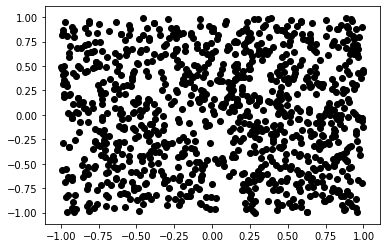

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], color="black")
plt.show()

In [6]:
# Left/Right
def gt_class1(point):
    if point[0]<0.0:
        return [1,0]
    else:
        return [0,1]

In [47]:
# Circle
import math

def gt_class2(point):
    x = point[0]
    y = point[1]
    dist = math.sqrt(x**2+y**2)
    if dist<0.5:
        return [1,0]
    else:
        return [0,1]

In [59]:
# Diagonal
import math

def gt_class3(point):
    x = point[0]
    y = point[1]
    if x*1.0+y*1.0<0.5:
        return [1,0]
    else:
        return [0,1]

Wählen Sie hier zwischen:

- gt_class1
- gt_class2
- gt_class3

um zu testen, wie gut das Perzeptron unterschiedliche Klassifikationsprobleme lösen kann.

In [48]:
gt_class = gt_class2

In [49]:
gt_class((-0.5,1.0))

[0, 1]

In [50]:
gt_class((-0.5,-1.0))

[0, 1]

In [51]:
gt_class((+0.1,-1.0))

[0, 1]

In [52]:
gt_class((+0.1,-.1))

[1, 0]

In [53]:
for p in data_x[:10]:
    print(p, gt_class(p))

[0.33967015 0.38834379] [0, 1]
[-0.77510456 -0.29808479] [0, 1]
[ 0.71482856 -0.81160969] [0, 1]
[ 0.42511411 -0.05042226] [1, 0]
[0.24965868 0.55891767] [0, 1]
[-0.0372393   0.75858595] [0, 1]
[-0.07005531  0.84233271] [0, 1]
[-0.92931687 -0.79445349] [0, 1]
[-0.3137514  0.0577674] [1, 0]
[0.10039862 0.63360756] [0, 1]


In [54]:
data_y = [gt_class(p) for p in data_x]

In [55]:
data_y[:10]

[[0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [0, 1]]

In [56]:
data_y = np.array( [gt_class(p) for p in data_x ] )

In [57]:
type(data_y)

numpy.ndarray

In [58]:
data_y.shape

(1000, 2)

In [59]:
colors = [np.argmax(row) for row in data_y]

In [60]:
colors[:10]

[1, 1, 1, 0, 1, 1, 1, 1, 0, 1]

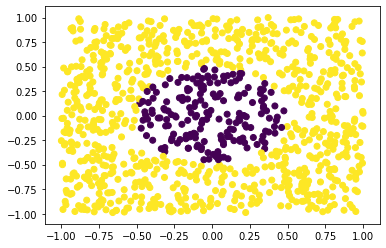

In [61]:
import matplotlib.pyplot as plt
plt.scatter(data_x[:,0], data_x[:,1], c=colors)
plt.show()

In [62]:
def generate_example_data(how_much):
    min_coord = -1.0
    max_coord = +1.0
    data_x = np.random.uniform(min_coord,max_coord, (how_much, 2))
    data_y = np.array( [gt_class(p) for p in data_x ] )
    return data_x, data_y

# Trainings- und Testdaten erzeugen

In [63]:
data_x, data_y = generate_example_data(1000)

In [64]:
data_x.shape

(1000, 2)

In [65]:
data_y.shape

(1000, 2)

In [66]:
N = int(data_x.shape[0] * 0.8)

In [67]:
N

800

In [68]:
x_train = data_x[:N]
y_train = data_y[:N]
x_test  = data_x[N:]
y_test  = data_y[N:]

In [69]:
x_train.shape

(800, 2)

In [70]:
y_train.shape

(800, 2)

In [71]:
x_test.shape

(200, 2)

In [72]:
y_test.shape

(200, 2)

# Netz aufbauen und trainieren

In [73]:
n_inputs = 2+1
n_outputs = 2
W = create_new_perceptron(n_inputs,n_outputs)

In [74]:
W.shape

(3, 2)

In [75]:
W

array([[-0.8566914 , -0.99193626],
       [ 0.28525631, -0.74534079],
       [ 0.20052845,  0.23459817]])

In [76]:
test_perceptron(W, x_test, y_test)

Korrekt: 66 von 200


0.33

In [77]:
alpha = 0.01
nr_train_steps = 1000
history = train_perceptron(W,
                           x_train, y_train,
                           x_test, y_test,
                           nr_train_steps,
                           alpha)


Train step:  0
Korrekt: 65 von 200

Train step:  100
Korrekt: 92 von 200

Train step:  200
Korrekt: 107 von 200

Train step:  300
Korrekt: 129 von 200

Train step:  400
Korrekt: 135 von 200

Train step:  500
Korrekt: 145 von 200

Train step:  600
Korrekt: 149 von 200

Train step:  700
Korrekt: 158 von 200

Train step:  800
Korrekt: 158 von 200

Train step:  900
Korrekt: 158 von 200


# Netz testen

In [78]:
x_test.shape

(200, 2)

In [79]:
x_test[:5]

array([[ 0.13339865, -0.37798307],
       [-0.55260711, -0.42113538],
       [ 0.91414606,  0.1639268 ],
       [ 0.02606508,  0.17170754],
       [-0.30860608,  0.57518689]])

In [80]:
y_test.shape

(200, 2)

In [81]:
y_test[:5]

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1]])

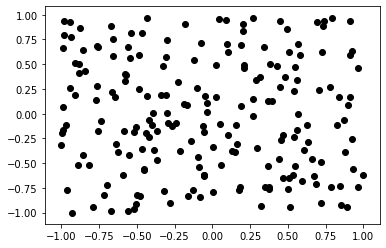

In [82]:
plt.scatter(x_test[:,0], x_test[:,1], color="black")
plt.show()

In [83]:
all_outputs = []
for row_vec in x_test:
    x = np.append(row_vec,[1])
    out = predict(W,x)
    all_outputs.append( out )

In [84]:
all_outputs[:10]

[array([0.21389576, 0.78894125]),
 array([0.27314415, 0.74844011]),
 array([0.17145134, 0.80749251]),
 array([0.25137939, 0.75150384]),
 array([0.3018092 , 0.70801737]),
 array([0.20430197, 0.80412256]),
 array([0.23517812, 0.76854354]),
 array([0.11724644, 0.86800495]),
 array([0.34743647, 0.6740624 ]),
 array([0.27223789, 0.74027507])]

In [85]:
colors = [np.argmax(outarray) for outarray in all_outputs]

In [86]:
colors[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

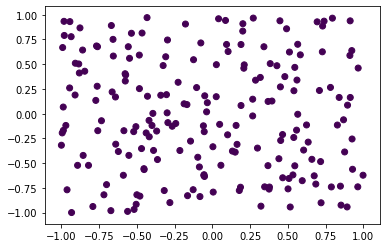

In [87]:
plt.scatter(x_test[:,0], x_test[:,1], c=colors)
plt.show()